In [16]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [15]:
#Load the data
df=pd.read_csv('/Users/meribozulanova/Desktop/bio_stats/physiological_cycles.csv')
df.head(5)

,Cycle start time,Cycle end time,Cycle timezone,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,Energy burned (cal),...,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %
0,2023-07-29 00:50:03,NaN,UTC+02:00,80.0,47.0,142.0,33.53,97.50,NaN,NaN,...,17.1,400.0,443.0,212.0,87.0,101.0,43.0,467.0,0.0,93.0
1,2023-07-28 00:10:59,2023-07-29 00:50:03,UTC+02:00,84.0,48.0,140.0,34.10,96.00,11.2,1702.0,...,17.3,567.0,608.0,393.0,76.0,98.0,41.0,534.0,67.0,93.0
2,2023-07-27 00:09:00,2023-07-28 00:10:59,UTC+02:00,56.0,50.0,117.0,33.80,90.79,11.1,1724.0,...,17.2,380.0,406.0,174.0,74.0,132.0,26.0,545.0,81.0,93.0
3,2023-07-26 01:26:49,2023-07-27 00:09:00,UTC+02:00,74.0,48.0,129.0,34.30,94.50,10.4,1576.0,...,16.8,331.0,366.0,218.0,48.0,65.0,35.0,514.0,46.0,91.0
4,2023-07-25 00:31:54,2023-07-26 01:26:49,UTC+02:00,93.0,48.0,147.0,34.30,95.11,11.5,1787.0,...,17.5,384.0,413.0,251.0,35.0,98.0,29.0,457.0,0.0,93.0


## Data Preprocessing

- In the data preprocessing phase, we first examined the shape of the data to understand its dimensions.
- We extracted and created a new dataframe with relevant features only
- Next, we checked for null values in the dataset and removed them if any were found.

In [17]:
df.columns

Index(['Cycle start time', 'Cycle end time', 'Cycle timezone',
       'Recovery score %', 'Resting heart rate (bpm)',
       'Heart rate variability (ms)', 'Skin temp (celsius)', 'Blood oxygen %',
       'Day Strain', 'Energy burned (cal)', 'Max HR (bpm)', 'Average HR (bpm)',
       'Sleep onset', 'Wake onset', 'Sleep performance %',
       'Respiratory rate (rpm)', 'Asleep duration (min)',
       'In bed duration (min)', 'Light sleep duration (min)',
       'Deep (SWS) duration (min)', 'REM duration (min)',
       'Awake duration (min)', 'Sleep need (min)', 'Sleep debt (min)',
       'Sleep efficiency %'],
      dtype='object')

In [4]:
#Check the aggregates 
df.describe()

,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,Energy burned (cal),Max HR (bpm),Average HR (bpm),Sleep performance %,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %
count,179.000000,179.000000,179.000000,179.000000,176.000000,185.000000,185.000000,185.000000,185.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,64.195531,49.938547,116.994413,34.472346,94.334943,12.123243,1900.864865,154.356757,68.978378,79.726257,16.564246,416.279330,456.491620,236.581006,76.290503,103.407821,40.145251,514.363128,48.648045,91.335196
std,22.179573,4.222947,19.421550,0.513678,2.206130,4.578536,621.429600,19.456537,6.158201,17.857046,0.528891,96.361329,105.997582,63.618755,24.645907,36.939157,22.514193,50.263429,40.285137,4.279484
min,1.000000,42.000000,29.000000,33.070000,86.000000,0.000000,40.000000,94.000000,57.000000,13.000000,14.900000,71.000000,89.000000,56.000000,2.000000,0.000000,1.000000,342.000000,0.000000,70.000000
25%,48.000000,47.000000,105.000000,34.190000,93.165000,8.200000,1546.000000,140.000000,65.000000,71.000000,16.200000,371.500000,411.000000,202.000000,61.000000,78.500000,27.000000,481.000000,17.000000,90.000000
50%,69.000000,49.000000,119.000000,34.500000,94.500000,12.500000,1761.000000,156.000000,68.000000,82.000000,16.500000,423.000000,466.000000,229.000000,76.000000,105.000000,35.000000,512.000000,47.000000,92.000000
75%,81.500000,52.000000,129.500000,34.830000,95.845000,15.400000,2151.000000,169.000000,72.000000,93.500000,16.900000,477.000000,526.000000,282.000000,92.500000,128.000000,47.000000,550.500000,72.000000,94.000000
max,98.000000,69.000000,158.000000,35.600000,98.400000,20.700000,4594.000000,188.000000,92.000000,100.000000,18.100000,639.000000,667.000000,400.000000,144.000000,187.000000,141.000000,650.000000,196.000000,99.000000


### Create new DataFrame 
We only need the following features for our analysis:

- Heart rate variability - x 
- Asleep duration
- Cycle Start Time (the time I fall asleep)


In [18]:
df1 = df.filter(items=['Cycle start time','Heart rate variability (ms)','Asleep duration (min)'])

In [22]:
df1.head(5)

,Cycle start time,Heart rate variability (ms),Asleep duration (min)
0,2023-07-29 00:50:03,142.0,400.0
1,2023-07-28 00:10:59,140.0,567.0
2,2023-07-27 00:09:00,117.0,380.0
3,2023-07-26 01:26:49,129.0,331.0
4,2023-07-25 00:31:54,147.0,384.0


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cycle start time             186 non-null    object 
 1   Heart rate variability (ms)  179 non-null    float64
 2   Asleep duration (min)        179 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.5+ KB


In [21]:
#Let's now drop rows with missing values
df1 = df1.dropna(how='any')

### Feature Engineering 
In our database, column'Cycle start time' defines the time I fall asleep each day. We want to understand what is the best time to go to bed to get the highest HRV. We will create 5 time ranges: 'Between 8 and 10 pm', 'Between 10pm and midnight", 'Between midnight and 2 am', 'Between 2 am and 4 am'. Our goal is to understand what is the best time range for our HRV.

In [27]:
#Converting time format and specifying the amount of time ranges
df1['Cycle start time'] = pd.to_datetime(df1['Cycle start time'])

cst = df1['Cycle start time'].dt.hour + df1['Cycle start time'].dt.minute / 60
cst[cst < 12] += 24

time_range_start = 20    # 8 pm in the evening
time_range_end = 30      # 6 am in the morning
ranges_count = 5         # 2 hour time frames from 8 pm to 6 am

time_ranges = 0

for idx in range(ranges_count):
  range_start = time_range_start + (time_range_end - time_range_start) / ranges_count * idx
  range_end = range_start + (time_range_end - time_range_start) / ranges_count
  time_ranges = cst.between(range_start, range_end, inclusive='left') * range_start + time_ranges


<BarContainer object of 5 artists>

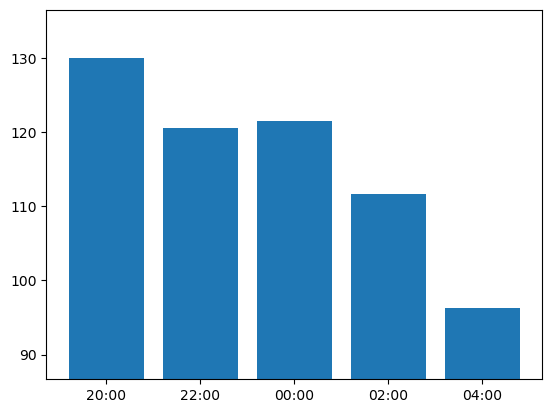

In [28]:
#visualizing my HRV mean for each time range. 
def hours_to_str(n):
  hours = int(n - n % 1)
  if hours >= 24:
    hours -= 24
  minutes = int(n % 1 * 60)
  return f"{hours:02d}:{minutes:02d}"

result = df['Heart rate variability (ms)'].groupby(time_ranges).mean().iloc[1:].T

result.index = result.index.map(hours_to_str)

plt.ylim(result.min() * 0.9, result.max() * 1.05)
plt.bar(result.index, result)

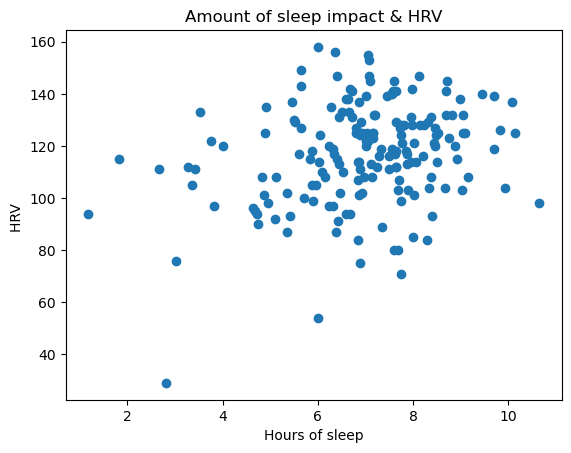

Correlation Coefficient: 0.2633137469778647
P-Value: 0.00036906092653132437


In [30]:
#Now I want to see if there is any correlation between the amount of sleep and my HRV
x_data = df1['Asleep duration (min)']/60
y_data = df1['Heart rate variability (ms)']
plt.scatter(x_data, y_data)

# Add labels and a title to the plot
plt.xlabel('Hours of sleep')
plt.ylabel('HRV ')
plt.title('Amount of sleep impact & HRV')

plt.show()

from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(x_data, y_data)

print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-Value: {p_value}")

In [31]:
MeriBozz/HRV_and_sleep

'/Users/meribozulanova/Desktop/bio_stats'

In [32]:
git init
git remote add Bio_analytics git@MeriBozz.com:/HRV_and_sleep.git
git add .
git commit -m "Importing my project to Git, without saving history."
git push beanstalk master

SyntaxError: invalid syntax (1489148336.py, line 1)